![header](https://i.imgur.com/I4ake6d.jpg)

# COPERNICUS MARINE IN SITU AMERICA TRAINING (3/5)

<div style="text-align: right"><i> 13-03-Part-three-out-of-five </i></div>

***
# PLOTTING TIMESERIES

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction">1. Introduction</a></span></li>
        <li>
            <span><a href="#2.-Setup" data-toc-modified-id="2.-Setup">2. Setup</a></span>
            <ul>
                <li><span><a href="#2.1.-Python-packages" data-toc-modified-id="2.1.-Python-packages">2.1. Python packages</a></span></li>
            </ul>
        </li>
        <li><span><a href="#3.-Steps" data-toc-modified-id="3.-Steps">3. Steps</a></span>
            <ul>
                <li><span><a href="#3.1.-Reading" data-toc-modified-id="3.1.-Reading">3.1. Reading</a></span></li>
                <li><span><a href="#3.2.-Cleaning" data-toc-modified-id="3.2.-Cleaning">3.2. Cleaning</a></span></li>
                <li><span><a href="#3.3.-Visualization" data-toc-modified-id="3.3.-Visualization">3.3. Visualization</a></span></li>
                <li><span><a href="#3.4.-Exporting-data-to-csv" data-toc-modified-id="3.4.-Exporting-data-to-csv">3.4. Exporting data to csv</a></span></li> 
            </ul>
         </li>
        <li><span><a href="#4.-Wrap-up" data-toc-modified-id="4.-Wrap-up">4. Wrap-up</a></span>
            </li>
    </ul>
</div>

***

## 1. Introduction
[Go back to the "Table of Contents"](#Table-of-Contents)

In Situ Time Series are the result of the measurement of a set of variables over time, at fixed or transitory locations. This notebook will focus on fixed-location time series, as the transitory ones have their dedicated notebook ( [13-04-plotting-trajectories.ipynb
](13-04-plotting-trajectories.ipynb)).
<br>Fixed-location time series are reported currently by three type of sources: 
- Moorings (MO) - [video](https://www.youtube.com/embed/muDfOceW4pA/?start=84&end=237)
- River flows (RF)
- Tide Gauges (TG) - [video](https://www.youtube.com/watch?v=IUhrY1NfFxA)

We will work with randomly downloaded files from Moorings available at `/data/timeSeries` folder. Nevertheless, if you want to download your own set of files you can do it as indicated in notebook [13-02-subsetting-and-download.ipynb
](13-02-subsetting-and-download.ipynb).  

## 2. Setup
[Go back to the "Table of Contents"](#Table-of-Contents)

### 2.1. Python packages

To properly run the notebook, we need first to load the packages available from the Jupyter Notebook Ecosystem. Please run the `next cell`:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import IPython
import datetime
import pandas as pd
import numpy as np
import os
import xarray
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.dates as mdates
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn')
%matplotlib inline

<div class="alert alert-block alert-warning">
<b>WARNING</b>

***  
If any of them raises any error it means you need to install the module first. For doing so please:
1. Open a new cell in the notebook
2. Run <i>`!conda install packageName --yes`</i> or <i>`!conda install -c conda-forge packageName --yes`</i> or <i>`!pip install packageName`</i>
3. Import again!
<br><br>
Example: <i>how-to-solve import error for json2html module </i>

![region.png](img/errorImporting.gif)
</div>

## 3. Steps
[Go back to the "Table of Contents"](#Table-of-Contents)

### 3.1. Reading

`Run the next cell` to see the files already available in the `/data/timeSeries/` folder:

In [2]:
ts_files_dir = os.path.join(os.getcwd(),'data','timeSeries') 
os.listdir(ts_files_dir)

['GL_TS_MO_41043.nc',
 'GL_TS_MO_41044.nc',
 'GL_TS_MO_41046.nc',
 'GL_TS_MO_41052.nc',
 'GL_TS_MO_41053.nc',
 'GL_TS_TG_FortDeFranceTG_01minute.nc',
 'GL_TS_TG_PointeAPitreTG_01minute.nc',
 'GL_TS_TG_SaintMartinTG_01minute.nc']

`Set one` of the above available `file name` and `run the next cells`:

In [3]:
file = 'GL_TS_MO_41052.nc'
path = os.path.join(ts_files_dir, file)

In [4]:
ds = xarray.open_dataset(path)
ds.close()
ds

<xarray.Dataset>
Dimensions:       (DEPTH: 4, LATITUDE: 453720, LONGITUDE: 453720, POSITION: 453720, TIME: 453720)
Coordinates:
  * TIME          (TIME) datetime64[ns] 2011-04-15T16:50:00.000000256 ... 202...
  * LATITUDE      (LATITUDE) float32 18.25 18.25 18.25 ... 18.25 18.25 18.25
  * LONGITUDE     (LONGITUDE) float32 -64.76 -64.76 -64.76 ... -64.76 -64.76
Dimensions without coordinates: DEPTH, POSITION
Data variables: (12/32)
    TIME_QC       (TIME) float32 ...
    POSITION_QC   (POSITION) float32 ...
    DC_REFERENCE  (TIME) object ...
    DEPH          (TIME, DEPTH) float32 ...
    DEPH_QC       (TIME, DEPTH) float32 ...
    DEPH_DM       (TIME, DEPTH) object ...
    ...            ...
    WDIR          (TIME, DEPTH) float64 ...
    WDIR_QC       (TIME, DEPTH) float32 ...
    WDIR_DM       (TIME, DEPTH) object ...
    WSPD          (TIME, DEPTH) float64 ...
    WSPD_QC       (TIME, DEPTH) float32 ...
    WSPD_DM       (TIME, DEPTH) object ...
Attributes: (12/47)
    data_type:                      OceanSITES time-series data
    format_version:                 1.4
    platform_code:                  41052
    institution:                    United states (Unknown)
    institution_edmo_code:           
    site_code:                       
    ...                             ...
    last_date_observation:          2021-05-31T23:50:00Z
    last_latitude_observation:      18.25100
    last_longitude_observation:     -64.76300
    date_update:                    2021-06-13T02:34:04Z
    history:                        2021-06-13T02:34:04Z : Creation
    data_mode:                      M

The cell above gives an overview of the content of the file: variables, dimensions, coordinates, global attributes...
<br>i.e we are already able to know the platform last position. Let's draw it on a map: `run the next cell`

- Map limits

In [5]:
pad = 4
extent = [float(ds.geospatial_lon_min)-pad,
          float(ds.geospatial_lon_max)+pad,
          float(ds.geospatial_lat_min)-pad,
          float(ds.geospatial_lat_max)+pad] #minX,maxX,#minY,maxY

- Point colors

In [6]:
inner = np.random.rand(3,)#random
edge = np.random.rand(3,)#random

- Figure

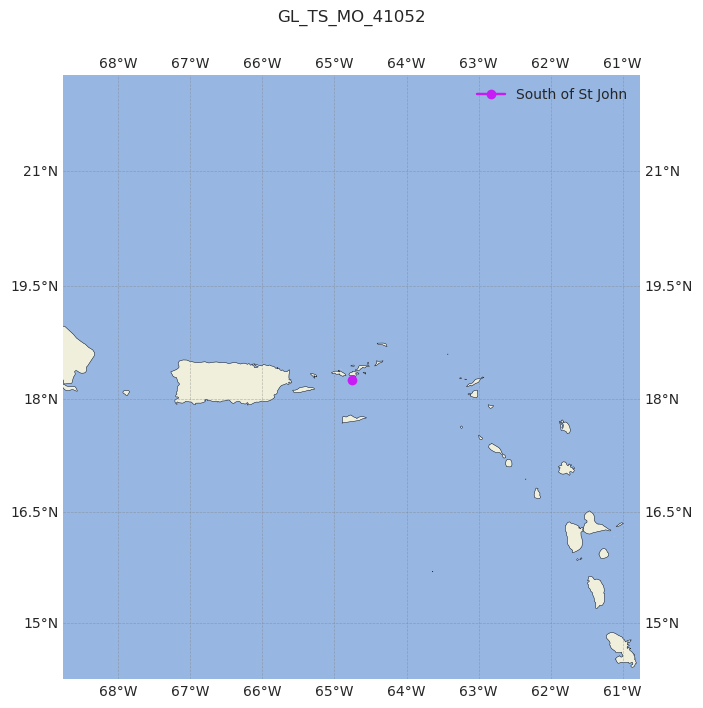

In [7]:
plt.figure(num=None, figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
# Map projection
ax = plt.axes(projection=ccrs.Mercator())
#Adding grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
#Adding point
plt.plot(float(ds.last_longitude_observation), float(ds.last_latitude_observation), color=inner, markeredgecolor=edge, marker='o',transform=ccrs.Geodetic(),label=ds.platform_name)
#Adding legend
ax.legend()
#Adding land, ocean and coastaline features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
#Applying map limts
ax.set_extent(extent)
#Adding title
plt.title(ds.id, pad=25)

#uncomment next lines to save the figure
#figure_name = ds.id+'_lastLocation.png'
#plt.savefig(figure_name) 
plt.show()

Let's add some cool background!

In [8]:
tile_img = cimgt.StamenTerrain()#https://scitools.org.uk/cartopy/docs/v0.18/_modules/cartopy/io/img_tiles.html

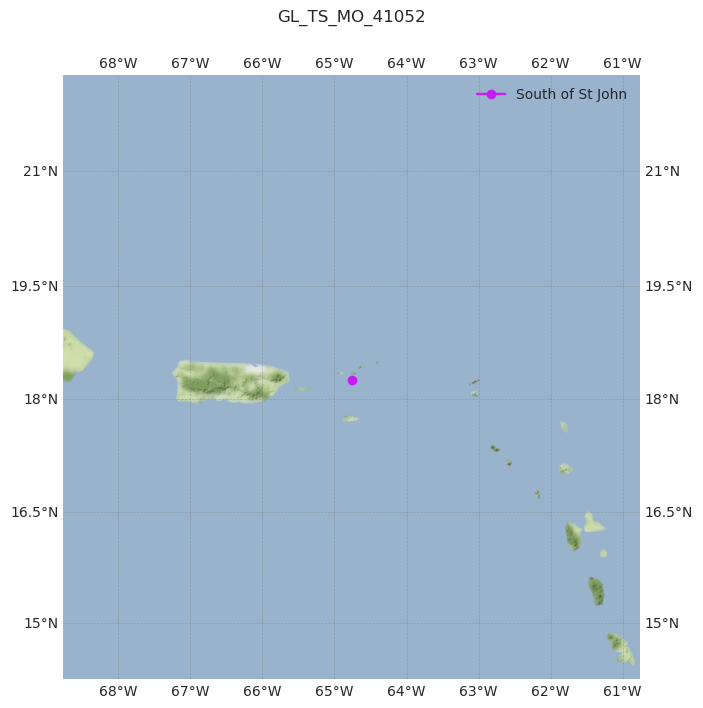

In [9]:
plt.figure(num=None, figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
# Map projection
ax = plt.axes(projection=ccrs.Mercator())
#Adding grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
#Adding point
plt.plot(float(ds.last_longitude_observation), float(ds.last_latitude_observation), color=inner, markeredgecolor=edge, marker='o',transform=ccrs.Geodetic(),label=ds.platform_name)
#Adding legend
ax.legend()
#Adding tile image
zoom = np.ceil(-np.sqrt(2)*np.log(np.divide((extent[1]-extent[0])/2.0,350.0))) #zoom based on limits
ax.add_image(tile_img,int(zoom))#adding tile
#Applying map limts
ax.set_extent(extent)
#Adding title
plt.title(ds.id, pad=25)

#uncomment next lines to save the figure
#figure_name = ds.id+'_lastLocationTileImage.png'
#plt.savefig(figure_name) 
plt.show()

<div class="alert alert-block alert-success">
<b>CHALLENGE!</b>

***  
Try other tile images: OSM(), GoogleTiles(), Stamen()....
</div>

<br>Let's list now the available variables: `run the next cell`

In [10]:
for var in ds.variables:
    print(var + ':' + ds[var].attrs['long_name'])

TIME:Time
TIME_QC:Time quality flag
LATITUDE:Latitude of each location
LONGITUDE:Longitude of each location
POSITION_QC:Position quality flag
DC_REFERENCE:Station/Location unique identifier in data centre
DEPH:Depth
DEPH_QC:Depth quality flag
DEPH_DM:Depth method of data processing
TEMP:Sea temperature
TEMP_QC:Sea temperature quality flag
TEMP_DM:Sea temperature method of data processing
ATMP:Atmospheric pressure at altitude
ATMP_QC:Atmospheric pressure at altitude quality flag
ATMP_DM:Atmospheric pressure at altitude method of data processing
DRYT:Air temperature in dry bulb
DRYT_QC:Air temperature in dry bulb quality flag
DRYT_DM:Air temperature in dry bulb method of data processing
GSPD:Gust wind speed
GSPD_QC:Gust wind speed quality flag
GSPD_DM:Gust wind speed method of data processing
VHM0:Spectral significant wave height (Hm0)
VHM0_QC:Spectral significant wave height (Hm0) quality flag
VHM0_DM:Spectral significant wave height (Hm0) method of data processing
VMDR:Mean wave direct

Let's focus on one of the above parameters `run the next cell` to see its attributes:

In [11]:
param = 'TEMP'
ds[param]

<xarray.DataArray 'TEMP' (TIME: 453720, DEPTH: 4)>
[1814880 values with dtype=float64]
Coordinates:
  * TIME     (TIME) datetime64[ns] 2011-04-15T16:50:00.000000256 ... 2021-05-...
Dimensions without coordinates: DEPTH
Attributes:
    standard_name:        sea_water_temperature
    long_name:            Sea temperature
    units:                degrees_C
    data_mode:            M
    ancillary_variables:  TEMP_QC TEMP_DM

Let's focus at some vertical level:

In [12]:
level = 3

Let's see the corresponding depth(s): `run the next cell`

Text(0.5, 0, 'DEPH (m)')

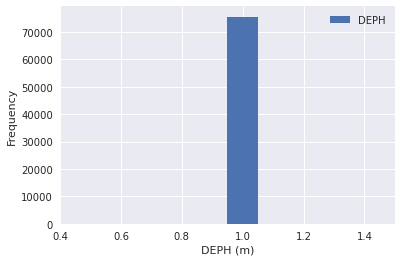

In [13]:
ds['DEPH'][:,level].to_dataframe().plot(kind='hist', align='left')
plt.xlabel('DEPH ('+ds['DEPH'].units+')')

Let's have a quick glimpse to the whole serie:

Text(0, 0.5, 'TEMP (degrees_C)')

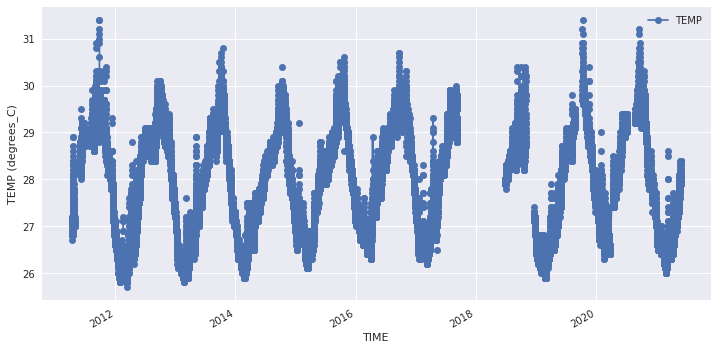

In [14]:
df = ds[param][:,level].to_dataframe()
df.plot(kind='line', marker='o', linestyle='-', figsize=(12,6))
plt.ylabel(param+' ('+ds[param].units+')')

#uncomment next lines to save the figure
#figure_name = ds.id+'_timeSerie.png'
#plt.gcf().patch.set_facecolor('white')
#plt.gcf().savefig(figure_name, bbox_inches='tight') 

### 3.2. Cleaning
[Go back to the "Table of Contents"](#Table-of-Contents)

Each value of the selected parameter has an associated "quality flag", which are to be considered as a realiability indicator. As a norm, these 'realiability indicators' are stored in variables called the same as the parameter plus '_QC'. Let's check the 'flags' meanings for our parameter in hand: `run the next cell`

In [15]:
pd.DataFrame(data=ds[param+'_QC'][:,level].attrs['flag_values'],
             index=ds[param+'_QC'][:,level].attrs['flag_meanings'].split(' '), 
             columns=['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
value_below_detection,6
nominal_value,7
interpolated_value,8
missing_value,9


From the above list, users are recommended to use only the data flagged as 1 ('good data') or 2 ('probably good data').

What are the flags of our parameter?: `run the next cells`

- custom colorbar for flags

In [16]:
cmap = mpl.cm.Paired #options at: https://matplotlib.org/stable/gallery/color/colormap_reference.html
steps = [0,1,2,3,4,5,6,7,8,9,10]
norm = mpl.colors.BoundaryNorm(steps, cmap.N, extend='both')
m = cm.ScalarMappable(cmap=cmap, norm=norm)

- parameter values colored by flags

Text(0, 0.5, 'TEMP (degrees_C)')

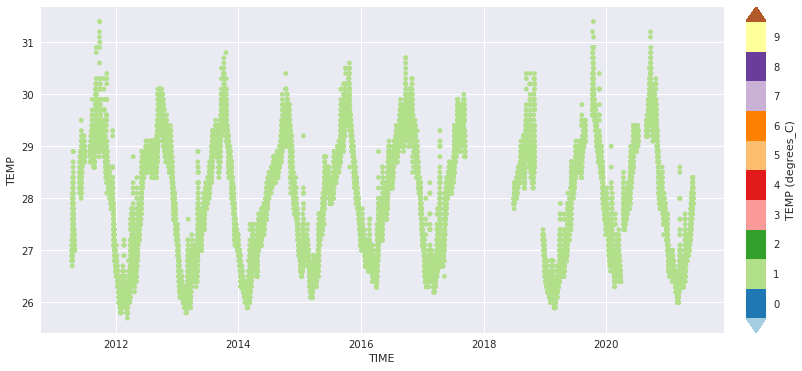

In [17]:
#scatter plot without colorbar
df = ds[param][:,level].to_dataframe()
df['TIME'] = df.index
df[param+'_QC'] = ds[param+'_QC'][:,level].to_dataframe()
ax = df.plot.scatter(x='TIME',y=param,c=param+'_QC',colormap=cmap,norm=norm, figsize=(13,6), colorbar=False)
#adding custom colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.3)
clb = plt.colorbar(m, cax=cax)   
labels = [str(i) for i in steps]
ticks = [i+ .5 for i in steps]
clb.set_ticklabels(labels)
clb.set_ticks(ticks)
clb.set_label(param+'_QC', labelpad=5)
plt.ylabel(param+' ('+ds[param].units+')')

#uncomment next lines to save the figure
#figure_name = ds.id+'_timeSerieQualityCustomColorbar.png'
#plt.gcf().patch.set_facecolor('white')
#plt.gcf().savefig(figure_name, bbox_inches='tight') 

Let's ensure we only keep data flagged as 1 or 2 before further exploration: `run the next cell`

In [19]:
flags = [1,2]

In [20]:
data = ds[param][:,level].where(ds[param+'_QC'][:,level].isin(flags))

### 3.3. Visualization
[Go back to the "Table of Contents"](#Table-of-Contents)

Let's set a common size for all the figures we are going to buil next: `run the next cell`

In [21]:
figsize=(12,6)

- Slicing

Let's zoom the original serie in a certain time range: `run the next cells`

In [22]:
timestamp_start = '2020-01-01 01:00'# formatted as '%Y-%m-%d %H:%M'
timestamp_end = '2020-12-31 23:59'# formatted as '%Y-%m-%d %H:%M'

Text(0, 0.5, 'TEMP (degrees_C)')

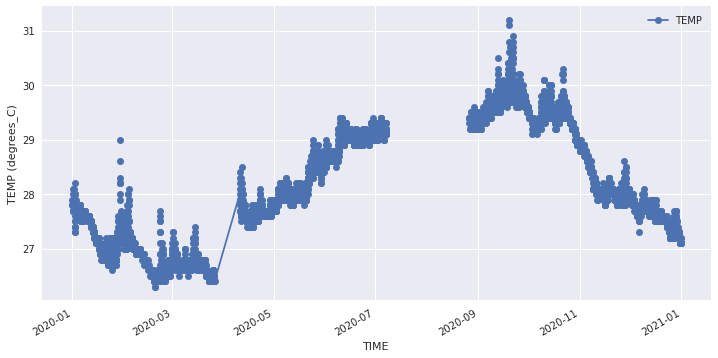

In [23]:
data.sel(
    TIME=slice(timestamp_start,timestamp_end)
).to_dataframe().plot(kind='line', marker='o', linestyle='-', figsize=figsize)
plt.ylabel(param+' ('+ds[param].units+')')

#uncomment next lines to save the figure
#figure_name = ds.id+'_timeSerieRange.png'
#plt.gcf().patch.set_facecolor('white')
#plt.gcf().savefig(figure_name, bbox_inches='tight') 

- Resampling

Let's decrease the sampling resolution computing the monthly mean:

Text(0, 0.5, 'TEMP (degrees_C)')

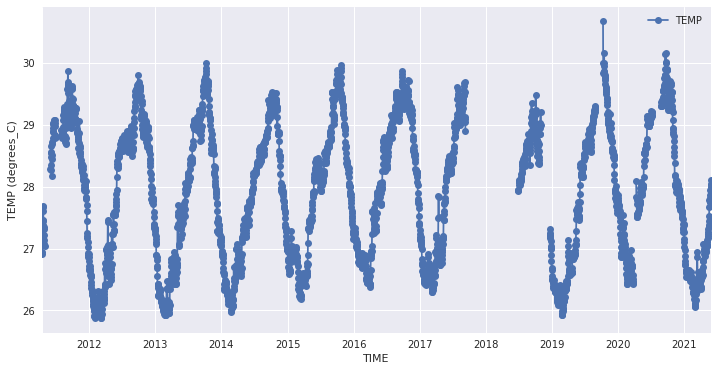

In [25]:
data.resample(
    TIME="1D"
).mean().to_dataframe().plot(kind='line', marker='o', linestyle='-', figsize=figsize)
plt.ylabel(param+' ('+ds[param].units+')')

#uncomment next lines to save the figure
#figure_name = ds.id+'_timeSerieResampled.png'
#plt.gcf().patch.set_facecolor('white')
#plt.gcf().savefig(figure_name, bbox_inches='tight') 

Let's increase the sampling resolution to 5min with a linear interpolation:

Text(0, 0.5, 'TEMP (degrees_C)')

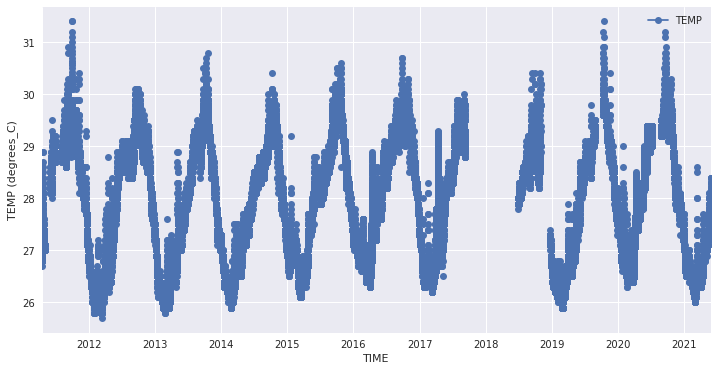

In [26]:
data.resample(
    TIME="5min"
).interpolate("linear").to_dataframe().plot(kind='line', marker='o', linestyle='-', figsize=figsize)
plt.ylabel(param+' ('+ds[param].units+')')

#uncomment next lines to save the figure
#figure_name = ds.id+'_timeSerieResampled.png'
#plt.gcf().patch.set_facecolor('white')
#plt.gcf().savefig(figure_name, bbox_inches='tight') 

- Splitting

Let's split the serie by year: `run the next cells`

Text(0, 0.5, 'TEMP (degrees_C)')

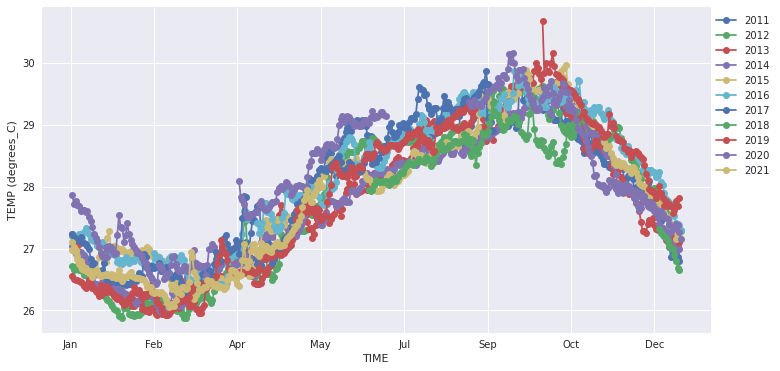

In [27]:
df = data.to_dataframe()
df2 = df.pivot_table(index=df.index.dayofyear, columns=df.index.year, values=param)
ax = df2.plot(kind='line', marker='o', linestyle='-', figsize=figsize)
plt.legend(loc='upper right', bbox_to_anchor=(1.10, 1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylabel(param+' ('+ds[param].units+')')

#uncomment next lines to save the figure
#figure_name = ds.id+'_timeSerieByYear.png'
#plt.gcf().patch.set_facecolor('white')
#plt.gcf().savefig(figure_name, bbox_inches='tight') 

Let's avoid repeating colors:

In [28]:
cmap = mpl.cm.tab20 #options at: https://matplotlib.org/stable/gallery/color/colormap_reference.html
steps = [int(year) for year in df2.columns]
norm = mpl.colors.BoundaryNorm(steps, cmap.N, extend='both')
m = cm.ScalarMappable(cmap=cmap, norm=norm)

Text(0, 0.5, 'TEMP (degrees_C)')

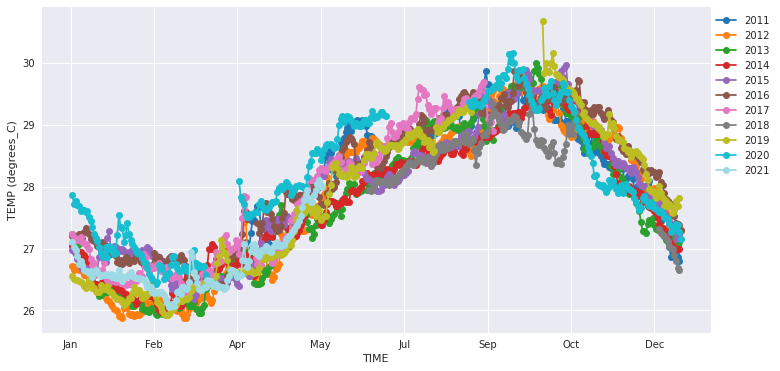

In [29]:
df = data.to_dataframe()
df2 = df.pivot_table(index=df.index.dayofyear, columns=df.index.year, values=param)
ax = df2.plot(kind='line', marker='o', linestyle='-', cmap=cmap, figsize=figsize)
plt.legend(loc='upper right', bbox_to_anchor=(1.10, 1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylabel(param+' ('+ds[param].units+')')

#uncomment next lines to save the figure
#figure_name = ds.id+'_timeSerieByYearCutomColors.png'
#plt.gcf().patch.set_facecolor('white')
#plt.gcf().savefig(figure_name, bbox_inches='tight') 

### 3.4. Exporting data to csv
[Go back to the "Table of Contents"](#Table-of-Contents)

Let's export the full serie to csv.

- Coordinates + Coordinates QC

In [30]:
dic1 = {i:ds[i].data for i in ['TIME','TIME_QC']}

- Parameter + Parameter QC

In [31]:
dic2 = {i:ds[i][:,level].data for i in [param,param+'_QC']}

- merge into a pandas dataframe:

In [32]:
dic = {**dic1, **dic2}
df = pd.DataFrame.from_dict(dic)

- Exportation

In [33]:
out_put_dir = os.getcwd() #by default: current working directory. Set a different path if you want

In [34]:
file_name = ds.attrs['id']+'.csv'
file_name

'GL_TS_MO_41052.csv'

In [35]:
df.to_csv(os.path.join(out_put_dir, file_name))

<div class="alert alert-block alert-info" style="margin-left: 2em">
<b>TIP</b>

***  
Check your output directory for the file exported and inspect the content!

---



## 4. Wrap-up
[Go back to the "Table of Contents"](#Table-of-Contents)

So far you should already know how to deal with Time Series data from fixed platforms (moorings, tide gauges, river flows...).<br> `If you don't, please ask us!`